# Fall Problem Session 10
## Classifying Pumpkin Seeds IV

In this notebook you continue to work with the pumpkin seed data from <a href="https://link.springer.com/article/10.1007/s10722-021-01226-0">The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.)</a> by Koklu, Sarigil and Ozbek (2021). By the end of the notebook you will select a final model for this data and check its performance on the test set.

The problems in this notebook will cover the content covered in some of our `Classification`, `Dimension Reduction` and our `Ensemble Learning` notebooks.

In [1]:
## importing packages you'll probably use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Load and prepare the data and refresh your memory

Run the code below in order to:

- Load the data stored in `Pumpkin_Seeds_Dataset.xlsx` in the `Data` folder,
- Create a column `y` where `y=1` if `Class=Ürgüp Sivrisi` and `y=0` if `Class=Çerçevelik` and
- Make a train test split setting $10\%$ of the data aside as a test set.

If you need to refresh your memory on these data and the problem, you may want to look at a small subset of the data, look back on `Fall Problem Session 7`, `Fall Problem Session 8` and `Fall Problem Session 9` and/or browse Figure 5 and Table 1 of this paper, <a href="pumpkin_seed_paper.pdf">pumpkin_seed_paper.pdf</a>

In [2]:
## loading the data
seeds = pd.read_excel("../Data/Pumpkin_Seeds_Dataset.xlsx")

## make target column y
seeds['y'] = 0

seeds.loc[seeds.Class=='Ürgüp Sivrisi', 'y']=1

In [3]:
## importing train_test_split
from sklearn.model_selection import train_test_split

In [4]:
## making stratified train test split
seeds_train, seeds_test = train_test_split(seeds.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.1,
                                              stratify=seeds.y.values)

## recording the features in a list for model building
features = seeds_train.columns[:-2]

#### 2. An AdaBoost classifier


##### a.

Import the adaptive boosting classifier model and decision tree models from `sklearn`

In [5]:
## import adaboost
from sklearn.ensemble import AdaBoostClassifier

## import decision tree
from sklearn.tree import DecisionTreeClassifier

##### b.

Using either a `for` loop or `GridSearchCV` determine the optimal value for `n_estimators` for an `AdaBoostClassifier` using a `DecisionTreeClassifier` with `max_depth=2` as its base estimator. Set the `learning_rate=1` in the `AdaBoostClassifier`. 

Plot the average cross-validation accuracy against the value of `n_estimators`.

In [6]:
## import what you need for the cross-validation here
from sklearn.model_selection import GridSearchCV


In [18]:
## Run the cross-validation here

n_estimators = range(1,26)

grid_cv = GridSearchCV(AdaBoostClassifier(learning_rate = 1,base_estimator=DecisionTreeClassifier(max_depth=2),random_state=1), # first put the model object here
                          param_grid = {'n_estimators':n_estimators}, # and n_estimators here
                          scoring = 'accuracy', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = 10) # put the number of cv splits here



## Consider these for the number of estimators
grid_cv.fit(seeds_train[features],seeds_train.y)


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                          learning_rate=1, random_state=1),
             param_grid={'n_estimators': range(1, 26)}, scoring='accuracy')

In [20]:
np.argmax(grid_cv.cv_results_['mean_test_score'])

6

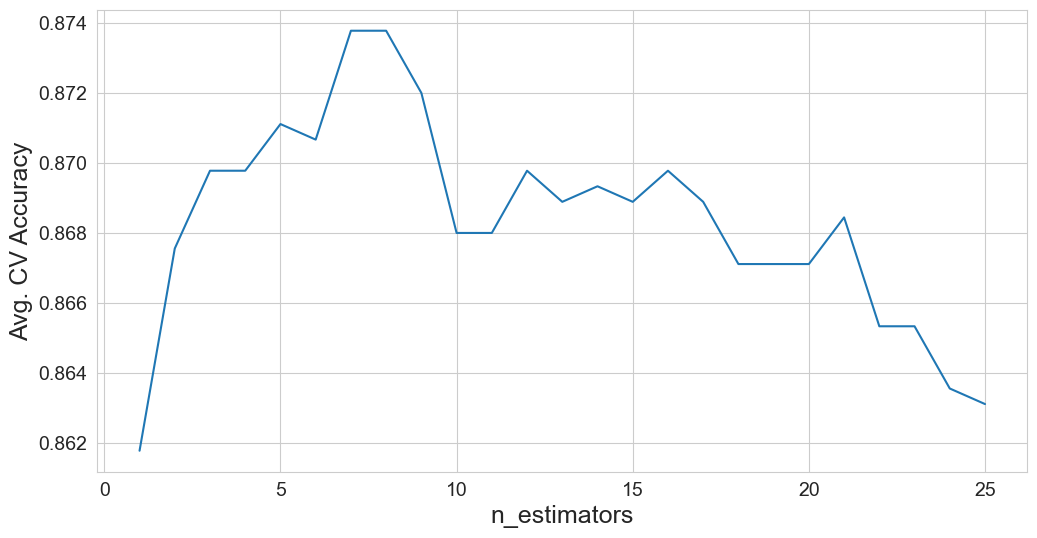

In [19]:
plt.figure(figsize=(12,6))

plt.plot(n_estimators,grid_cv.cv_results_['mean_test_score'])

plt.xlabel("n_estimators", fontsize=18)
plt.ylabel("Avg. CV Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

##### c.

How many decision trees do you choose for your adaptive boosting classifier?

##### Write your answer here

#### 3. A voting classifier

In this problem you will explore making a voting classifier for these data.

##### a.

Recall that a voting classifier is a classification model where the prediction for a particular observation is an average of the predictions from a group of classifiers.

As a first step to building a voting classifier review the best models you have built through `Fall Problem Session 7` to `Fall Problem Session 9`:

- A logistic regression model regressing `y` on a single feature,
- A $k$ nearest neighbors model using PCA processed features as input,
- A support vector machine model,
- A quadratic discriminant analysis model,
- A random forest model and, in this notebook,
- An adaptive boosting model.

##### b. 

We should only expect a voting classifier to perform better than its constituent models when there is not a lot of overlap in the observations that each model incorrectly classifies. For example, if most of your models are incorrect about a particular observation, then the voter model will also be incorrect for that observation.

As an initial investigation for the voter model:

- Make a validation set of size 100 from the training data,
- Fill in the missing pieces of code to fit all of the models you have considered up to this point on the training set from the validation split you just made,
- Get predictions for all of these models on the validation set and
- Then run the `plt.imshow` code chunk to show where these models were incorrect on the validation set.

In [27]:
## First import everything we'll need
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
len(seeds_val)

100

In [22]:
## Make the validation split
seeds_tt, seeds_val = train_test_split(seeds_train.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=100,
                                              stratify=seeds_train.y.values)



In [29]:
##### make all the model objects ####

## Adaptive Boosting
## fill in the parameters you found above
ada_boost = AdaBoostClassifier(learning_rate = 1,base_estimator=DecisionTreeClassifier(max_depth=2),random_state=1,n_estimators=7)

## K nearest neighbors with PCA pre-processing
knn = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(3)),
                   ('knn', KNeighborsClassifier(38))])

## QDA
qda = Pipeline([('scale', StandardScaler()),
                    ('qda', QuadraticDiscriminantAnalysis())])

## Logistic Regression
log_reg = LogisticRegression()

## Support vector machine
svm = Pipeline([('scale', StandardScaler()),
                   ('svm', SVC(C = 30))])

## Random Forest
rf = RandomForestClassifier(max_depth=8, 
                            n_estimators=500)


##### Fit all of the models #####
## complete the adaboost code
ada_boost.fit(seeds_tt[features], seeds_tt.y)
knn.fit(seeds_tt[features], seeds_tt.y)
qda.fit(seeds_tt[features], seeds_tt.y)
log_reg.fit(seeds_tt['Aspect_Ration'].values.reshape(-1,1), seeds_tt.y)
svm.fit(seeds_tt[features], seeds_tt.y)
rf.fit(seeds_tt[features], seeds_tt.y)
  
    
##### Get predictions on the validation set #####
## complete the adaboost code
ada_pred = ada_boost.predict(seeds_val[features])
knn_pred = knn.predict(seeds_val[features])
qda_pred = qda.predict(seeds_val[features])
log_pred = log_reg.predict(seeds_val['Aspect_Ration'].values.reshape(-1,1))
svm_pred = svm.predict(seeds_val[features])
rf_pred = rf.predict(seeds_val[features])


##### This records what observations in the validation set
##### Each model got wrong
wrongs = np.zeros((6, len(seeds_val)))
                ## pred != y.values produces an array of Trues and Falses for where
                ## an entry is true if the prediction does not equal the actual
                ## and false if the prediction does equal the actual
wrongs[0,:] = ada_pred != seeds_val.y.values
wrongs[1,:] = knn_pred != seeds_val.y.values
wrongs[2,:] = qda_pred != seeds_val.y.values
wrongs[3,:] = log_pred != seeds_val.y.values
wrongs[4,:] = svm_pred != seeds_val.y.values
wrongs[5,:] = rf_pred != seeds_val.y.values

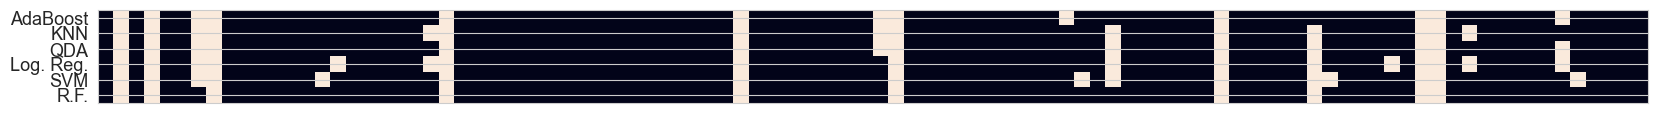

In [32]:
### This makes a heat map of where each model was incorrect
### A bright spot indicates the model was wrong for that observation
plt.figure(figsize=(20,20))

## docs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(wrongs)

plt.xticks([])
plt.yticks([0,1,2,3,4,5], 
              ["AdaBoost", "KNN", "QDA", "Log. Reg.", "SVM", "R.F."],
              fontsize=13)
plt.show()

##### c. 

Look at the heat map you just made. Each square in this map indicates whether a model (the rows) got a particular observation (the columns) incorrect. A bright square indicates a model was incorrect for that observation, a dark square indicates that it was correct.

Based on this investigatory heat map do you think that a voter model made up of these models would do better than any one model? Why or Why not?

##### Write your thoughts here

##### d. 

Make a voter model using all of the models considered in <i>b.</i> above. Train it on the training set from the validation split. Then compare the accuracies of all models on the validation set to the voter model's validation accuracy. The code has been started for you because the logistic regression model required particular preprocessing in order to be fed into the voter model.

In [33]:
## import the VotingClassifier here
from sklearn.ensemble import VotingClassifier

## import the rest of what we'll need
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

In [34]:
## This function will only return the 'Aspect_Ration' column
def get_single_feature(df):
    return df['Aspect_Ration'].values.reshape(-1,1)

## fill in the rest of the VotingClassifier
vote = VotingClassifier([('log_reg', Pipeline([('get_column', FunctionTransformer(get_single_feature)),
                                                 ('log_reg', LogisticRegression())])),
                            ("AdaBoost", AdaBoostClassifier(learning_rate = 1,base_estimator=DecisionTreeClassifier(max_depth=2),random_state=1,n_estimators=7)),
                         ("KNN", Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(3)),
                   ('knn', KNeighborsClassifier(38))])),
                         ("QDA", Pipeline([('scale', StandardScaler()),
                    ('qda', QuadraticDiscriminantAnalysis())])),
                         ("SVM", Pipeline([('scale', StandardScaler()),
                   ('svm', SVC(C = 30))])),
                         ("R.F.",RandomForestClassifier(max_depth=8, 
                            n_estimators=500))])


## fit the model
vote.fit(seeds_tt[features],seeds_tt.y)


## get the voting model prediction
vote_pred = vote.predict(seeds_val[features])


## Here we record all of the accuracies on the validation set
vote_acc = accuracy_score(seeds_val.y, vote_pred)
log_acc = accuracy_score(seeds_val.y, log_pred)
knn_acc = accuracy_score(seeds_val.y, knn_pred)
ada_acc = accuracy_score(seeds_val.y, ada_pred)
qda_acc = accuracy_score(seeds_val.y, qda_pred)
svm_acc = accuracy_score(seeds_val.y, svm_pred)
rf_acc = accuracy_score(seeds_val.y, rf_pred)

In [35]:
## Prints them all out for you
print("Logistic regression validataion set accuracy = ", np.round(log_acc*100, 2))
print("KNN validataion set accuracy = ", np.round(knn_acc*100, 2))
print("QDA validataion set accuracy = ", np.round(qda_acc*100, 2))
print("SVM validataion set accuracy = ", np.round(svm_acc*100, 2))
print("Random forest validataion set accuracy = ", np.round(rf_acc*100, 2))
print("Adaboost validataion set accuracy = ", np.round(ada_acc*100, 2))
print("=========================================")
print("Voter model validataion set accuracy = ", np.round(vote_acc*100, 2))

Logistic regression validataion set accuracy =  83.0
KNN validataion set accuracy =  85.0
QDA validataion set accuracy =  86.0
SVM validataion set accuracy =  84.0
Random forest validataion set accuracy =  90.0
Adaboost validataion set accuracy =  87.0
Voter model validataion set accuracy =  88.0


#### 4. Choosing a final model

##### a.

Fill in the missing code below to run each of the seven models you just considered through 10-fold cross-validation.

In [39]:
## import the appropriate kfold object
from sklearn.model_selection import StratifiedKFold

In [41]:
## the number of CV splits
n_splits = 10

## complete the kfold object here
kfold = StratifiedKFold(random_state=1,
             shuffle=True,
             n_splits=n_splits)

## this will hold the accuracies for each split
cv_accs = np.zeros((n_splits, 7))


i = 0
## loop through the cross-validation splits
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    ## make the train holdout split
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    ### Making the model objects ###
    
    ## Adaptive Boosting
    ## fill in the parameters you found above
    ada_boost = AdaBoostClassifier(learning_rate = 1,base_estimator=DecisionTreeClassifier(max_depth=2),random_state=1,n_estimators=7)

    ## K nearest neighbors with PCA pre-processing
    knn = Pipeline([('scale', StandardScaler()),
                       ('pca', PCA(3)),
                       ('knn', KNeighborsClassifier(38))])

    ## QDA
    qda = Pipeline([('scale', StandardScaler()),
                        ('qda', QuadraticDiscriminantAnalysis())])

    ## Logistic Regression
    log_reg = LogisticRegression()

    ## Support vector machine
    svm = Pipeline([('scale', StandardScaler()),
                       ('svm', SVC(C = 30))])

    ## Random Forest
    rf = RandomForestClassifier(max_depth=8, 
                                n_estimators=500)
    
    ## Vote
    ## complete the VotingClassifier
    vote = VotingClassifier([('log_reg', Pipeline([('get_column', FunctionTransformer(get_single_feature)),
                                                 ('log_reg', LogisticRegression())])),
                            ("AdaBoost", AdaBoostClassifier(learning_rate = 1,base_estimator=DecisionTreeClassifier(max_depth=2),random_state=1,n_estimators=7)),
                         ("KNN", Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(3)),
                   ('knn', KNeighborsClassifier(38))])),
                         ("QDA", Pipeline([('scale', StandardScaler()),
                    ('qda', QuadraticDiscriminantAnalysis())])),
                         ("SVM", Pipeline([('scale', StandardScaler()),
                   ('svm', SVC(C = 30))])),
                         ("R.F.",RandomForestClassifier(max_depth=8, 
                            n_estimators=500))])
    
    ### Fitting the models ###
    ada_boost.fit(seeds_tt[features], seeds_tt.y)
    knn.fit(seeds_tt[features], seeds_tt.y)
    qda.fit(seeds_tt[features], seeds_tt.y)
    log_reg.fit(seeds_tt['Aspect_Ration'].values.reshape(-1,1), seeds_tt.y)
    svm.fit(seeds_tt[features], seeds_tt.y)
    rf.fit(seeds_tt[features], seeds_tt.y)
    vote.fit(seeds_tt[features], seeds_tt.y)

    
    ### Getting predictions ###
    ada_pred = ada_boost.predict(seeds_ho[features])
    knn_pred = knn.predict(seeds_ho[features])
    qda_pred = qda.predict(seeds_ho[features])
    log_pred = log_reg.predict(seeds_ho['Aspect_Ration'].values.reshape(-1,1))
    svm_pred = svm.predict(seeds_ho[features])
    rf_pred = rf.predict(seeds_ho[features])
    vote_pred = vote.predict(seeds_ho[features])

    
    ### Recording Accuracies ###
    cv_accs[i,0] = accuracy_score(seeds_ho.y, ada_pred)
    cv_accs[i,1] = accuracy_score(seeds_ho.y, knn_pred)
    cv_accs[i,2] = accuracy_score(seeds_ho.y, qda_pred)
    cv_accs[i,3] = accuracy_score(seeds_ho.y, log_pred)
    cv_accs[i,4] = accuracy_score(seeds_ho.y, svm_pred)
    cv_accs[i,5] = accuracy_score(seeds_ho.y, rf_pred)
    cv_accs[i,6] = accuracy_score(seeds_ho.y, vote_pred)

    i = i + 1

#### b. 

Which model had the best average cross-validation accuracy?

In [43]:
cv_accs.mean(0)

array([0.87422222, 0.88577778, 0.88488889, 0.868     , 0.884     ,
       0.89155556, 0.88933333])

In [42]:
np.argmax(cv_accs.mean(0))

5

##### c. 

Remember that it is often useful to compare your best model to a simple baseline. In this case the logistic regression model using a single feature is a good baseline we can use. How much does your best model improve upon this baseline? Is your model easier to interpret than the logistic regression model? Could you think of a situation in which we would go with the logistic regression model instead of the one with the best average cross-validation accuracy?

##### Write your answer here

##### d.

Train the model you chose on the entire training set. Then compute the accuracies on the training set and the test set. Does the model seem to be overfitting?

In [45]:
rf = RandomForestClassifier(max_depth=8, 
                                n_estimators=500)
rf.fit(seeds_train[features],seeds_train.y)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [46]:
accuracy_score(seeds_train.y,rf.predict(seeds_train[features]))

0.9422222222222222

In [47]:
accuracy_score(seeds_test.y,rf.predict(seeds_test[features]))

0.86

In [48]:
vote = VotingClassifier([('log_reg', Pipeline([('get_column', FunctionTransformer(get_single_feature)),
                                                 ('log_reg', LogisticRegression())])),
                            ("AdaBoost", AdaBoostClassifier(learning_rate = 1,base_estimator=DecisionTreeClassifier(max_depth=2),random_state=1,n_estimators=7)),
                         ("KNN", Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(3)),
                   ('knn', KNeighborsClassifier(38))])),
                         ("QDA", Pipeline([('scale', StandardScaler()),
                    ('qda', QuadraticDiscriminantAnalysis())])),
                         ("SVM", Pipeline([('scale', StandardScaler()),
                   ('svm', SVC(C = 30))])),
                         ("R.F.",RandomForestClassifier(max_depth=8, 
                            n_estimators=500))])

vote.fit(seeds_train[features],seeds_train.y)

VotingClassifier(estimators=[('log_reg',
                              Pipeline(steps=[('get_column',
                                               FunctionTransformer(func=<function get_single_feature at 0x0000023C2F251D30>)),
                                              ('log_reg',
                                               LogisticRegression())])),
                             ('AdaBoost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                 learning_rate=1,
                                                 n_estimators=7,
                                                 random_state=1)),
                             ('KNN',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('pca', PCA(n_components=3)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=38))])),
                             ('QDA',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('qda',
                                               QuadraticDiscriminantAnalysis())])),
                             ('SVM',
                              Pipeline(steps=[('scale', StandardScaler()),
                                              ('svm', SVC(C=30))])),
                             ('R.F.',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=500))])

In [49]:
accuracy_score(seeds_train.y,vote.predict(seeds_train[features]))

0.9031111111111111

In [50]:
accuracy_score(seeds_test.y,vote.predict(seeds_test[features]))

0.868

#### 5. Considering other metrics

##### a.

In this classification problem we only considered accuracy, which was reasonable given the problem as well as the near $50\%-50\%$ split of the two pumpkin seed classes.

Describe a situation in which you would want to consider a metric other than accuracy.

##### Write your answer here

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)